<a href="https://colab.research.google.com/github/08mitesh/machine-learning-examples/blob/master/collaborative_filtering_example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [8]:
## movie names dataframe
movie_names = pd.read_csv("movies.csv")

## movie ratings dataframe
ratings_data = pd.read_csv("ratings.csv")

ratings_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [9]:
# merge movie and ratings on the basis of movie id
movie_data = pd.merge(ratings_data, movie_names, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
## To get an mean of each movie, first group by movie and 
## find the mean and sorted them in ascending order
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False)


title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [18]:
## The movies have now been sorted according to the ascending order of their ratings.
## However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. 
## Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users

movie_data.groupby('title')['rating'].count().sort_values(ascending=False)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Name: rating, Length: 9719, dtype: int64

In [14]:
## created new dataframe and storing movie title and rating mean
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
print(ratings_mean_count)
print()
## Next, we need to add the number of ratings for a movie to the ratings_mean_count dataframe.
## Execute the following script to do so:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
print(ratings_mean_count)


                                             rating
title                                              
'71 (2014)                                 4.000000
'Hellboy': The Seeds of Creation (2004)    4.000000
'Round Midnight (1986)                     3.500000
'Salem's Lot (2004)                        5.000000
'Til There Was You (1997)                  4.000000
...                                             ...
eXistenZ (1999)                            3.863636
xXx (2002)                                 2.770833
xXx: State of the Union (2005)             2.000000
¡Three Amigos! (1986)                      3.134615
À nous la liberté (Freedom for Us) (1931)  1.000000

[9719 rows x 1 columns]

                                             rating  rating_counts
title                                                             
'71 (2014)                                 4.000000              1
'Hellboy': The Seeds of Creation (2004)    4.000000              1
'Round Midnight (1986)        

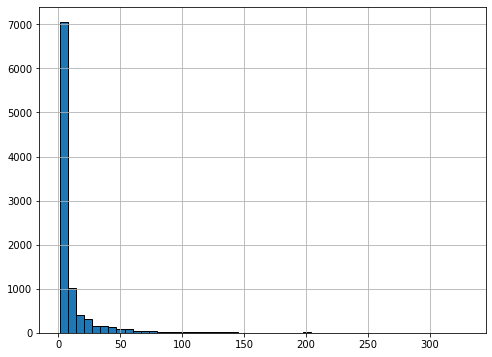

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
# plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

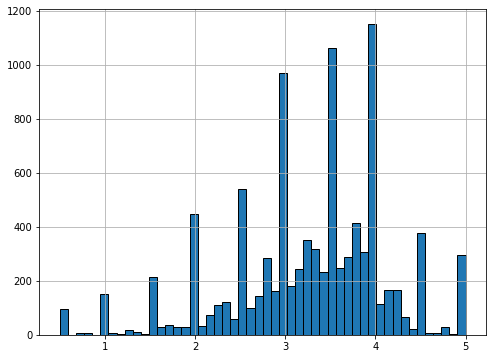

In [21]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 7200x432 with 0 Axes>

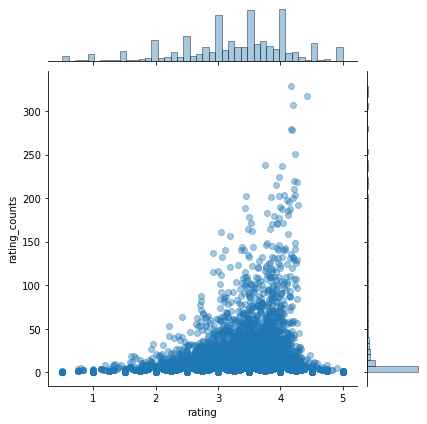

In [26]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)
## The graph shows that, in general, movies with higher average ratings actually have more number of ratings,
## compared with movies that have lower average ratings.

In [28]:
## Finding Similarities Between Movies
# We spent quite a bit of time on visualizing and preprocessing our data. 
# Now is the time to find the similarity between movies.

# We will use the correlation between the ratings of a movie as the similarity metric. 
# To find the correlation between the ratings of the movie, 
# we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie. 
# Bear in mind that this matrix will have a lot of null values since every movie is not rated by every user.

## To create the matrix of movie titles and corresponding user ratings, execute the following script:

user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
##We know that each column contains all the user ratings for a particular movie.
# Let's find all the user ratings for the movie "Forrest Gump (1994)" and find the movies similar to it.
# We chose this movie since it has the highest number of ratings and we want to find the 
# correlation between movies that have a higher number of ratings.

# To find the user ratings for "Forrest Gump (1994)", execute the following script:

selected_movie_ratings = user_movie_rating['Forrest Gump (1994)']
selected_movie_ratings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64

In [34]:
## Now let's retrieve all the movies that are similar to "Forrest Gump (1994)". 
# We can find the correlation between the user ratings for the "Forest Gump (1994)" and 
# all the other movies using corrwith() function as shown below:

movies_like_selected_movie = user_movie_rating.corrwith(selected_movie_ratings)

corr_of_selected_movie = pd.DataFrame(movies_like_selected_movie, columns=['Correlation'])

corr_of_selected_movie.dropna(inplace=True)

corr_of_selected_movie.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [35]:
## In the above script, we first retrieved the list of all the movies related to "Forrest Gump (1994)" along with their correlation value, using corrwith() function. 
# Next, we created a dataframe that contains movie title and correlation columns.
# We then removed all the NA values from the dataframe and displayed its first 5 rows using the head function.


# Let's sort the movies in descending order of correlation to see highly correlated movies at the top. Execute the following script:

corr_of_selected_movie.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [36]:
## From the output you can see that the movies that have high correlation with "Forrest Gump (1994)" are not very well known. 
# This shows that correlation alone is not a good metric for similarity because there can be a user who watched '"Forest Gump (1994)" 
# and only one other movie and rated both of them as 5.

## A solution to this problem is to retrieve only those correlated movies that have at least 
# more than 50 ratings. To do so, 
# will add the rating_counts column from the rating_mean_count dataframe to our corr_of_selected_movie dataframe. 
# Execute the following script to do so:

corr_of_selected_movie = corr_of_selected_movie.join(ratings_mean_count['rating_counts'])
corr_of_selected_movie.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [38]:
## You can see that the movie "$9.99", which has the highest correlation has only three ratings.
# This means that only three users gave same ratings to "Forest Gump (1994)",
#  "(500) Days of Summer (2009)". However, we can deduce that a movie cannot be declared similar to the
# another movie based on just 17 ratings. 
# This is why we added "rating_counts" column.
# Let's now filter movies correlated to "Forest Gump (1994)", that have more than 50 ratings. 
# The following code will do that:

corr_of_selected_movie[corr_of_selected_movie ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
